In [12]:
# Define the URL for the dataset
url = "https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv"

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first few rows to check if data loaded correctly
print(df.head())

   customerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0          No 

In [13]:
# Check the dimensions and info
print("Shape:", df.shape)
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [14]:
#Drop rows with missing values
df.dropna(inplace=True)

print(df.isnull().sum())

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
print(df.columns)


Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [16]:
# Drop rows with missing values (if not many)
df_cleaned = df.dropna()

# Or fill missing numeric values with the column mean:
# df['SomeNumericColumn'] = df['SomeNumericColumn'].fillna(df['SomeNumericColumn'].mean())

In [17]:
# If there's a date column, convert it to datetime
if 'JoinDate' in df_cleaned.columns:
    df_cleaned['JoinDate'] = pd.to_datetime(df_cleaned['JoinDate'])

# Convert churn column to a categorical type if needed
if 'Churn' in df_cleaned.columns:
    df_cleaned['Churn'] = df_cleaned['Churn'].astype('category')

In [23]:
# Example: If you have a 'tenure' column, you can use it directly or create it from dates:
# df_cleaned['tenure'] = (pd.to_datetime('today') - df_cleaned['JoinDate']).dt.days

In [18]:
df_cleaned.to_csv('cleaned_telecom_churn.csv', index=False)

In [19]:
churn_rate = df_cleaned['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

Churn Rate (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


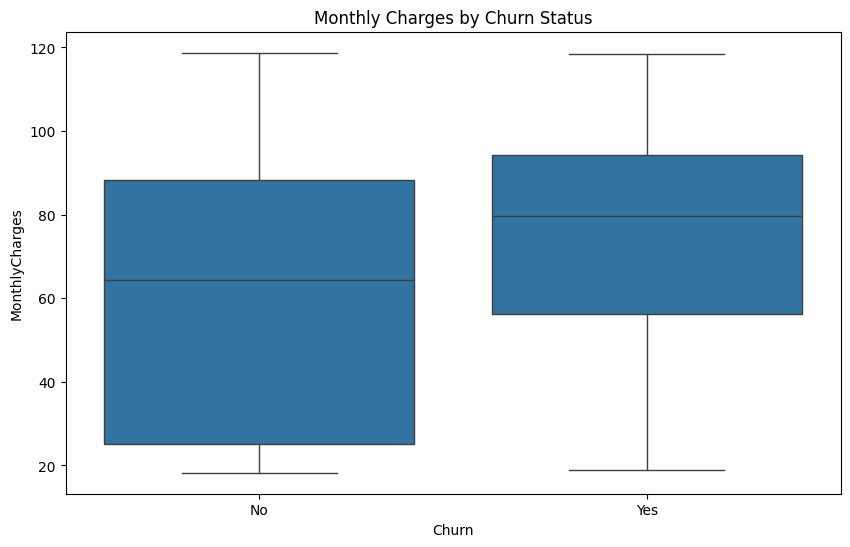

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cleaned)
plt.title("Monthly Charges by Churn Status")
plt.show()

In [25]:
import sqlite3

# Create a SQLite connection
conn = sqlite3.connect('telecom_churn.db')

# Write the dataframe to SQL table
df_cleaned.to_sql('churn_data', conn, if_exists='replace', index=False)

# Example query: Count churned vs. non-churned customers
query = "SELECT Churn, COUNT(*) as count FROM churn_data GROUP BY Churn;"
result = pd.read_sql_query(query, conn)
print(result)

conn.close()

  Churn  count
0    No   5174
1   Yes   1869
